**Predict Customer Clicked Ads Classification by Machine Learning**

by : Putrini Nur Amalina H.

# Initialization

In [ ]:
# import package, dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.2.0 requires scikit-learn<1.0.0,>=0.20.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
# You need to install library ppscore to calculate correlation between variable
!pip install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


## Read dataset

In [ ]:
# read dataset
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Copy of Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
225,225,78.70,30,374091830.0,133.99,Perempuan,2/10/2016 19:20,Yes,Bekasi,Jawa Barat,Otomotif
297,297,72.07,31,487973570.0,226.45,Perempuan,4/16/2016 16:38,No,Medan,Sumatra Utara,Furniture
204,204,69.78,29,492870770.0,218.79,Perempuan,5/24/2016 18:35,No,Tangerang Selatan,Banten,Otomotif
824,824,68.47,28,469233380.0,226.64,Perempuan,6/25/2016 0:33,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Electronic
905,905,75.94,27,371297570.0,236.96,Laki-Laki,2/16/2016 12:05,No,Bandung,Jawa Barat,Fashion


# Exploratory Data Analysis

In [ ]:
# melihat general info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Insight :
* Data consist of 1000 rows and 11 columns.
* There are missing value in these columns : `Daily Time Spent on Site`,`Area Income`,`Daily Internet Usage`,`Male`
* Data types in dataset are int64(2), float64(3) and object(6)

In [ ]:
nums = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

In [ ]:
# melihat informasi desriptif statistik
df[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df[cats].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


## Univariate analysis

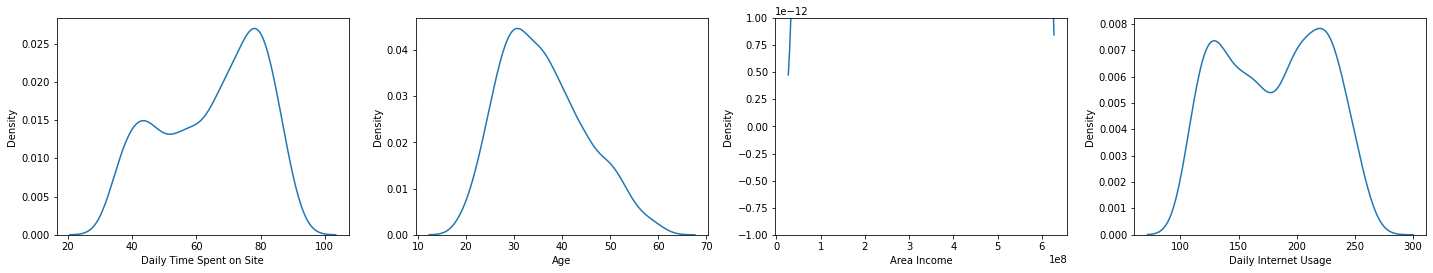

In [ ]:
plt.figure(figsize=(25, 25))
for i in range(0, len(nums)):
    plt.subplot(7, 5, i+1)
    sns.kdeplot(data=df, x=nums[i], palette='viridis')
    plt.xlabel(nums[i])
    plt.tight_layout()

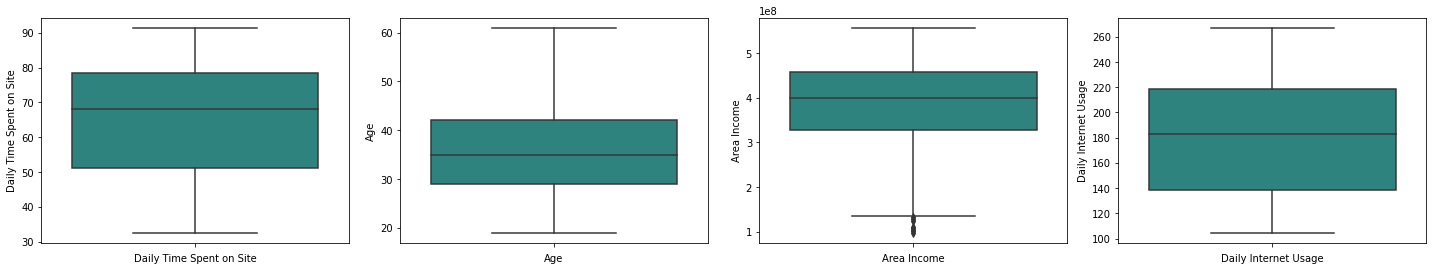

In [ ]:
plt.figure(figsize=(25, 25))
for i in range(0, len(nums)):
    plt.subplot(7, 5, i+1)
    sns.boxplot(y=df[nums[i]], palette='viridis', orient='v')
    plt.xlabel(nums[i])
    plt.tight_layout()

The distribution of all numerical columns are close to normal distribution and have no outliers detected

## Bivariate analysis

In [ ]:
a=df.groupby('Clicked on Ad')['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'].agg(['mean','median'])
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Daily Time Spent on Site             Age          Area Income  \
                                  mean  median    mean median          mean   
Clicked on Ad                                                                 
No                           76.787805  77.615  31.684   31.0  4.299090e+08   
Yes                          53.143111  51.500  40.334   40.0  3.400933e+08   

                           Daily Internet Usage          
                    median                 mean  median  
Clicked on Ad                                            
No             436334990.0           214.595233  216.50  
Yes            344980090.0           145.342077  138.79

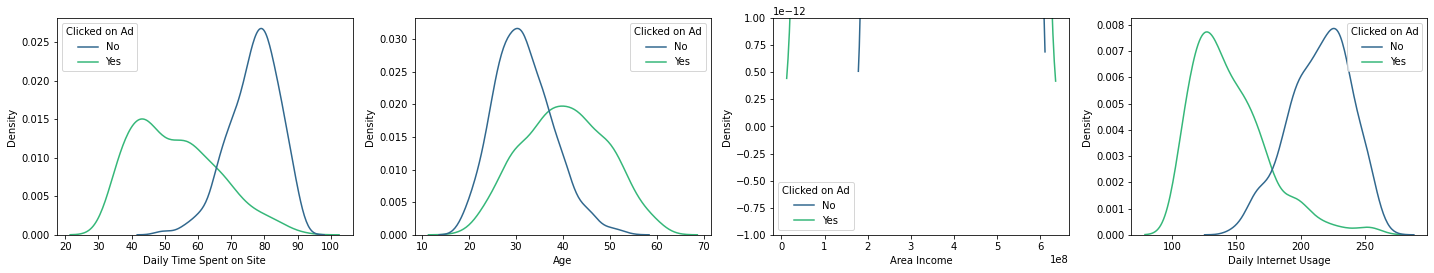

In [ ]:
plt.figure(figsize=(25, 25))
for i in range(0, len(nums)):
    plt.subplot(7, 5, i+1)
    sns.kdeplot(data=df, x=nums[i], hue='Clicked on Ad', palette='viridis')
    plt.xlabel(nums[i])
    plt.tight_layout()

Based on EDA analysis, the characteristics of customers who clicked on ads are: 
- User have older age compared to user who don't clicked on ads. User with younger age are usually more susceptive to digital ads therefore they tend to avoid the feature.
- User have fewer daily time spent on site rather than user who don't clicked on ad. Probably user with less time in the internet is more interested to ads.
- User have fewer daily internet usage rather than user who don't clicked on ads. Same as the previous point, less internet usage tends to take less time on the internet which user with less internet time are probably more interested to digital ads.

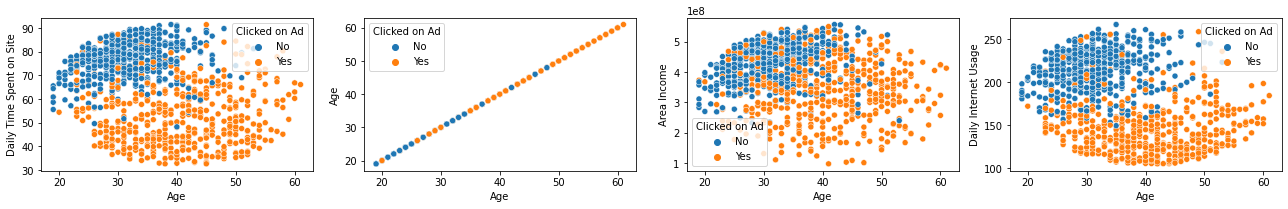

In [ ]:
#scatterplot
plt.figure(figsize=(18, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df['Age'], y=df[nums[i]],hue=df['Clicked on Ad'])
    plt.xlabel('Age')
    plt.tight_layout()

- User who don't clicked on ads have younger age and longer time spent on internet 
- User who don't clicked on ads have younger age and higher income
- User who don't clicked on ads have younger age and more daily internet usage

Text(0.5, 0, 'Daily Internet Usage')

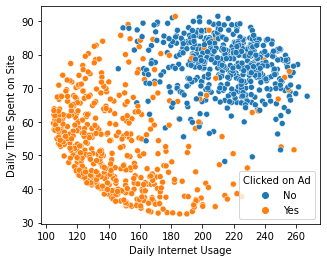

In [ ]:
#scatterplot
plt.figure(figsize=(5, 4))
sns.scatterplot(x=df['Daily Internet Usage'], y=df['Daily Time Spent on Site'], hue=df['Clicked on Ad'])
plt.xlabel('Daily Internet Usage')

Based on daily time spent on site and daily internet usage, users are segmented into 2 groups :
- Active user who have higher time spent on site and internet usage. This group low potential to clicked on ad.
- Passive user who have lower time spent on site and internet usage. This group have high potential to clicked on ad. 

Based on these insights, we can optimalized our advertisement feature to passive user who have lower time spent on site and lower internet usage.

## Multivariate analysis

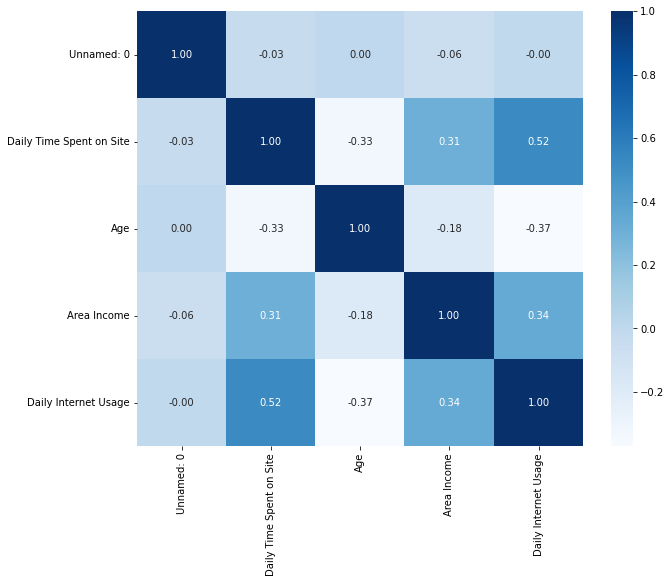

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

- `Daily Internet Usage` variable have high positive correlation with `Daily time spent on site` variable.

In [ ]:
import ppscore as pps

df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

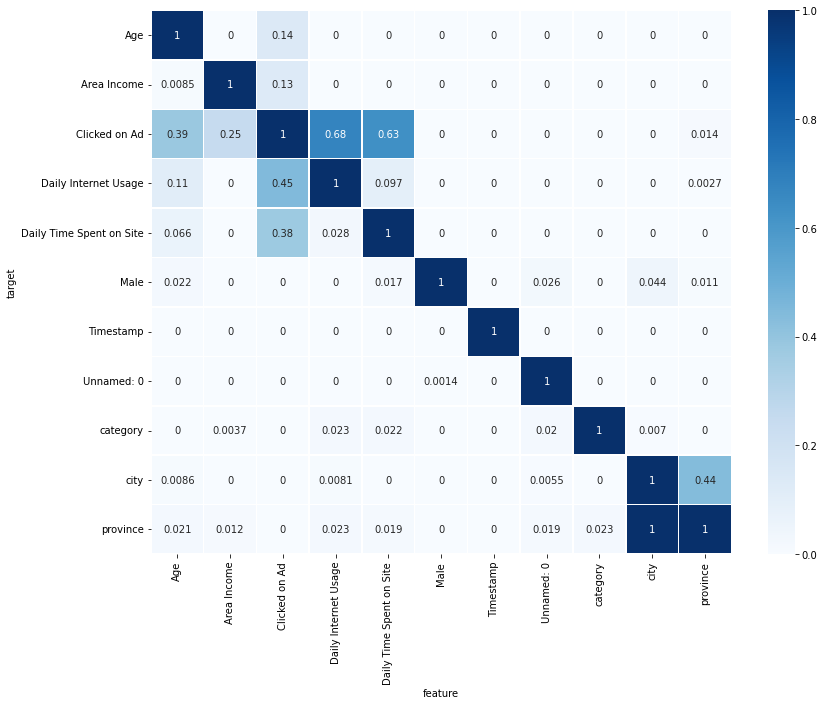

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

Based on PPS matrix above, the good predictors for `Clicked on ad` column as target are:
- Daily internet usage
- Daily time spent on site
- Age
- Area income


 

# Data Preprocessing

## Handle null values

In [ ]:
#cek jumlah null value pada dataset
df.isnull().sum().sort_values(ascending=False)

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Unnamed: 0                   0
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Strategy on how to handle null values
- daily time spent on site = imputation with mean based on age
- area income = imputation with mean based on age
- daily internet usage = imputation with mean based on age
- male = imputation with modus

In [ ]:
df.groupby('Age')['Daily Time Spent on Site','Area Income', 'Daily Internet Usage'].agg('mean').head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Daily Time Spent on Site,Area Income,Daily Internet Usage
Age,,,
19,60.966667,3.310754e+08,187.820000
20,66.708333,3.545414e+08,194.998333
21,68.460000,3.553520e+08,208.235000
22,71.010000,3.694890e+08,197.767500
23,68.333158,3.489636e+08,184.036842


In [ ]:
# handle null values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df.groupby(['Age'])['Daily Time Spent on Site'].transform('mean'))
df['Area Income'] = df['Area Income'].fillna(df.groupby(['Age'])['Area Income'].transform('mean'))
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df.groupby(['Age'])['Daily Internet Usage'].transform('mean'))
df['Male'] = df['Male'].fillna(df['Male'].mode()[0])

## Handle duplicated values

In [ ]:
print(f'jumlah row duplicated {df.duplicated().sum()}')

jumlah row duplicated 0


## Feature encoding

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('\n')

Value count kolom Male:
Perempuan    521
Laki-Laki    479
Name: Male, dtype: int64


Value count kolom Timestamp:
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64


Value count kolom Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64


Value count kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru      

Strategy :
- `city`, `province`, `category` : one hot encoding
- `Male`, `Clicked on ad` : label encoding

In [ ]:
# label encoder
mapping_male = {
    'Laki-Laki' : 0,
    'Perempuan' : 1}

mapping_clicked = {
    'No' : 0,
    'Yes' : 1}

df['male_mapped'] = df['Male'].map(mapping_male)
df['adclicked_mapped'] = df['Clicked on Ad'].map(mapping_clicked)

In [ ]:
# handle dengan one hot encoding
for cat in ['city', 'province', 'category']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

## Feature engineering

In [ ]:
df['year'] = pd.DatetimeIndex(df['Timestamp']).year
df['month'] = pd.DatetimeIndex(df['Timestamp']).month
df['day'] = pd.DatetimeIndex(df['Timestamp']).day
df['week'] = pd.DatetimeIndex(df['Timestamp']).week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


## Feature selection

In [ ]:
df.columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'male_mapped', 'adclicked_mapped',
       'city_Balikpapan', 'city_Bandar Lampung', 'city_Bandung',
       'city_Banjarmasin', 'city_Batam', 'city_Bekasi', 'city_Bogor',
       'city_Cimahi', 'city_Denpasar', 'city_Depok', 'city_Jakarta Barat',
       'city_Jakarta Pusat', 'city_Jakarta Selatan', 'city_Jakarta Timur',
       'city_Jakarta Utara', 'city_Makassar', 'city_Malang', 'city_Medan',
       'city_Padang', 'city_Pakanbaru', 'city_Palembang', 'city_Pontianak',
       'city_Samarinda', 'city_Semarang', 'city_Serang', 'city_Surabaya',
       'city_Surakarta', 'city_Tangerang', 'city_Tangerang Selatan',
       'city_Tasikmalaya', 'province_Bali', 'province_Banten',
       'province_Daerah Khusus Ibukota Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_K

Dropping columns unused for further data modeling which are : 
- `unnamed:0` = column have high variation, 
- `timestamp`, `clicked on ad`, `male`, `province`, `city`, `category` = columns already conversed into another variable

In [ ]:
df2=df.copy()
df2=df2.drop(['Unnamed: 0','Timestamp','Clicked on Ad','city','province','category','Male'], axis='columns')
df2.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,male_mapped,adclicked_mapped,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,...,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,year,month,day,week
737,71.23,52,290648960.0,122.59,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,1,5,1
995,72.97,30,499691990.0,208.58,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,2,11,6
209,40.15,38,271217030.0,134.88,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,6,27,26
68,75.74,25,427041090.0,215.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2016,1,16,2
420,34.30,41,372173760.0,160.74,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,5,16,20


## Split target and features

In [ ]:
X = df2.drop(labels=['adclicked_mapped'],axis=1)
y = df2[['adclicked_mapped']] 

# Data Modeling

## Split train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state = 123)

In [ ]:
print('Dimensi Train:',X_train.shape)
print('Dimensi Test:',X_test.shape)

Dimensi Train: (700, 65)
Dimensi Test: (300, 65)


## Data modeling

In [ ]:
from datetime import datetime as dt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

In [ ]:
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [ ]:
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.683333,0.606667,0.716535,0.008136
1,Logistic Regression,LogisticRegression(),0.500000,0.000000,0.000000,0.010815
2,Decision Tree,DecisionTreeClassifier(),0.943333,0.926667,0.958621,0.010684
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.936667,0.940000,0.933775,0.274779
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.940000,0.933333,0.945946,0.239675


Based on modeling process, model with the highest accuracy score is Random forest, Decision tree, Gradient boosting and Random forest. But considering the duration, decision tree is the model with lowest duration time. These are modeling results without handling the data normalization and these score can be increased more through implementing normalization to the dataset.

### Data normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [ ]:
result2 = experiment(X_train_minmax,X_test_minmax,y_train,y_test)
result2 = pd.DataFrame(result2)

In [ ]:
result2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.753333,0.700000,0.783582,0.007395
1,Logistic Regression,LogisticRegression(),0.940000,0.900000,0.978261,0.019050
2,Decision Tree,DecisionTreeClassifier(),0.940000,0.926667,0.952055,0.007378
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.943333,0.926667,0.958621,0.266748
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.936667,0.933333,0.939597,0.266462


After handling data normalization, there are several changes to the model result. The accuracy has increased for all models especially in KNN and Logistic Regression who have significant increase compared to the previous result. This proved that handle data normalization could improve model performance including accuracy, recall and precision score. 

**The objectives of our model is to predict the maximum amount of potential customer who clicked on ads. Therefore we should minimize the False Positive where customers who don't clicked on ad are falsely predicted to be clicked on ad.** This will lead to wrong market retargetting then lead to potential loss because we have spent marketing cost on false target. 

Therefore we have to <b>optimize the precision score while still considering other metrics to be in maximum score.</b>

Finally, random forest model is chosen considering the high precision and accuracy score.

# Evaluation
Model chosen in data modeling is random forest

## Confusion matrix

In [ ]:
final_model_lr = result2['model'][3]
y_pred_lr = final_model_lr.predict(X_test_minmax)

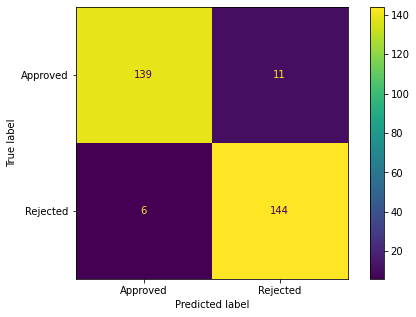

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test, y_pred_lr, 
  display_labels=["Approved", "Rejected"]
)

Note =
- True Positive = the number of observation where model predicted the customer would clicked on ad '1', and they actualy clicked on ad '1' (139)
- False Negative = the number of observation where model predicted the customer would not clicked on ad '0', but they actualy clicked on ad '1' (11)
- False Positive = the number of observation where model predicted the customer would clicked on ad '1', but they actualy not clicked on ad '0' (6)
- True Negative = the number of observation where model predicted the customer would not clicked on ad '0', and they actualy not clicked on ad '0' (144)

The objectives of our model is to predict the maximum amount of potential customer who clicked on ads. Therefore we should minimize the False Positive where customers who don't clicked on ad are falsely predicted to be clicked on ad. This wil lead to wrong market retargetting then lead to potential loss because we have spent marketing cost on false target. 

Based on the confusion matrix, our model have generated great result where the number of False Positive (Predicted clicked ad, but actually not) has optimally minimized at 2% rate. This leads to high True Positive score (Predicted clicked ad and actually did) at 46.3% where leads to higher potential profit.

## Feature importance

In [ ]:
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result2['model'][3].feature_importances_

In [ ]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

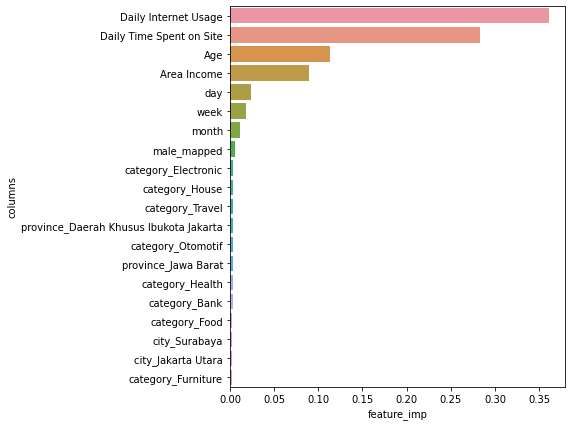

In [ ]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

Based on feature importance graphs above, we can see that there are 4 features which have high correlation in building the model, there are =
- 'Daily Internet Usage'
- 'Daily Time Spent on Site'
- 'Age'
- 'Area Income'

Feature with the highest correlation in predicting clicked ads customers is Daily Internet Usage and Daiy Time Spent on Site. This is proven based on previous EDA analysis that customers with lower daily internet usage and time spent on site have higher potential to clicked on ads.

Other features which also have high feature importance are age and area income. This supported by customers distribution mapping based on age and area income shows that customers who have younger age and higher income have low potential to clicked on ads.

# Business Recommendation

Based on EDA and Feature Importance analysis we can summarize that =
- Based on customers characteristics and behavior, we can devide our customers based on their class :
1. High class customers = These customers characterized by lower age and higher income. They usually spend higher daily internet usage and more time on internet.

2. Low class customers = These customers characterized by older age and lower income. They usually spend lower daily internet usage and fewer time on internet.

- Low class customers who have few daily internet usage and few time on internet are tend to more clicked on ads. This is suprisingly shows that customers with low exposure to internet are more interested into digital ads.
- Customers with older age are high potential market target. We can try to include the digital ads content to website where usually surfed by people with older ages such as social media platform for ex. Facebook, etc.
- High class customers who have higher daily internet usage and more time on internet are less likely to clicked on ads. This may happened because these customers are already used to digital ads so they tend to avoid ads and clicked them.

Business recommendation =
- We can targetting the digital ads to website who most likely to be visited by older customers. Potential websites are social media such as Facebook and entertainment/video streaming website such as youtube, etc.
- Implement the soft selling marketing that shows less likely like an ad and more corporated with the digital content. This is to targetting the high class customers who have more time spent on internet.
- Develop digital ads using mainstream content with simple but corporating topic that are trending recently. 

## Simulation

Assumptions =
- Marketing cost per customer = Rp 10.000
- Profit gained per customer who clicked on ads = Rp 15.000
- We will do the simulation targetting to population of 300 customers


### Without ML model

In [ ]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

- Customers are devided into two groups with 50:50 probability. There are customers who clicked on ads (150 customers) and customers who don't click on ads (150 customers)
- Marketing cost = 300 customers X Rp 10.000 = Rp 3.000.000
- Conversion rate = 150/300 *100% = 50%
- Revenue = 150 customers X Rp 15.000 = Rp 2.250.000
- Profit = Revenue - Cost = **- Rp 750.000**

Based on simulation above, the amount of potential loss is Rp 750.000 with rate around 25%.

### With ML model

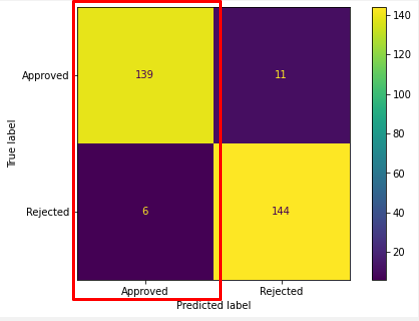

- Based on confusion matrix, we can group the customers based on the prediction who will clicked on ads (145 customers) and who don't clicked on ads (155 customers).
- Marketing cost = 145 customers X Rp 10.000 = Rp 1.450.000
- Conversion rate = 139/145 *100% = 95,86%
- Revenue = 139 customers X Rp 15.000 = Rp 2.085.000
- Profit = Revenue - Cost = **Rp 635.000**

Based on simulation above, the amount of profit is Rp 635.000 with profit rate 43,8%.

### Summary

Based on these simulations, we can summarize that :
- The amount of marketing cost invested in simulation without ML is higher and have no clear target since we spent the cost to the entire populations. This will lead to higher and unefficient used of marketing cost and also higher potential loss without any profit from its revenue.
- Meanwhile the amount of marketing cost invested in simulation implementing ML model is lesser because we already have prediction on customers who clicked on ads and who don't clicked on ads among the 300 customers. Therefore we will focused on group with predicted to clicked on ads customers. This will decreased the number of marketing target but also increasing the efficiency because we invested the marketing cost on the right population. This leads to higher conversion rate up to 95%. Then we can see the model able to increase the profit rate into around 43% compared to the previous simulation with no ML model implementation.

Thus the implementation of machine learning in predicting clicked ads customers is really useful in the industry because this will prevent business to experiences potential loss and leads to higher potential profit.